In [1]:
#  Place your files in a folder of your choice 
#  and set the current working directory to be that folder. 

%cd d:/UD/PythonProgramming_Online/FinalProject

d:\UD\PythonProgramming_Online\FinalProject


In [2]:
# Import your data into a pandas dataframe.

import pandas as pd

data = pd.read_csv('lc_2016_2017_short.csv',low_memory=False)

#    #STEP 1 --- Created by Juan
#    Explore your data by producing the following:
#    Descriptive statistics for numeric variables
#    Save the descriptive statistics to a comma delimited file.
#    Descriptive statistics for categorical variables
#    Save the descriptive statistics to a comma delimited file.

#  Number of observations and number of variables.

print(data.shape)

#  variable types.

print(data.dtypes)


#  Descriptive statistics for numeric variables

data_numeric = data.describe()

#  Descriptive statistics for categorical variables

data_categorical = data.describe(include='object')

#  Save descriptive statistics to csv files.

data_numeric.to_csv('gc_desc_numeric.csv')
data_categorical.to_csv('gc_desc_categorical.csv')

(200000, 72)
id                    int64
member_id           float64
loan_amnt             int64
funded_amnt           int64
funded_amnt_inv     float64
                     ...   
all_util            float64
total_rev_hi_lim    float64
inq_fi              float64
total_cu_tl         float64
inq_last_12m        float64
Length: 72, dtype: object


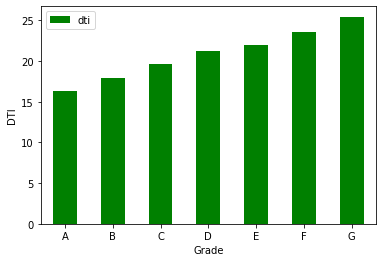

In [3]:
#    #STEP 2 --- Created by Ruby 
#    Create a bar chart to represent the average dti (debt-to-income ratio) for each grade of loan.  
#    In other words, the height of the bars depict the dti for a particular grade of loan.  
#    The relevant variables are dti and grade.

import matplotlib.pyplot as plt
chartData = data.loc[:,['dti', 'grade']].groupby('grade').mean()
chartData.plot(kind='bar', color='green')
plt.ylabel('DTI')
plt.xlabel('Grade')
plt.xticks(rotation=0)
plt.show()
plt.close()

In [4]:
#STEP 3 --- Created by Shiva
#Determine the percent of observations with each loan status among
#loans requested for each purpose – the sum of percentages should be 100% when
#summed across all loan statuses within each purpose.
#You will need the following variables for this task: 'purpose' , 'loan_status'
#data file ---- lc_2016_2017_short.csv
#import pandas as pd
#data = pd.read_csv('lc_2016_2017_short.csv')
import numpy as np
purpose = data.loc[:,'purpose']
loan_status = data.loc[:,'loan_status']

# Create the crosstab

ctab = pd.crosstab(purpose, loan_status)

# Sum across columns of ctab.

ctab_sum = ctab.sum(1)

# Transpose ctab.

ctab_transpose = ctab.transpose()

# Calculate the percent of observations with each loan status among

#loans requested for each purpose
ctab_percent = ctab_transpose / ctab_sum
ctab_percent = ctab_percent.transpose()

# Print the final results, transposing ctab_percent for easier readability.

print(ctab_percent.head())

loan_status         Charged Off   Current   Default  Fully Paid  \
purpose                                                           
car                    0.039965  0.759772  0.000000    0.180940   
credit_card            0.040190  0.771374  0.000072    0.159680   
debt_consolidation     0.052094  0.737646  0.000053    0.173611   
home_improvement       0.040045  0.738911  0.000000    0.189684   
house                  0.056025  0.639535  0.000000    0.253700   

loan_status         In Grace Period  Late (16-30 days)  Late (31-120 days)  
purpose                                                                     
car                        0.007466           0.003074            0.008783  
credit_card                0.007255           0.004420            0.017008  
debt_consolidation         0.009581           0.005521            0.021494  
home_improvement           0.008022           0.004972            0.018365  
house                      0.014799           0.013742            0.

In [5]:
#STEP 4 --- Created by Patrick and Aida

# ***** PART 4 IS NOT DONE YET, NEEDS TWEAKING TO DEBUG ERRORS ******

#Plot bar charts for the percent of observations for each loan status
# with loan status on the x-axis and the percent with the loan status as the height of the bar
#You will produce a separate bar chart for each purpose

chartData = data.loc[:,['loan_status', 'ctab_percent']].groupby('loan_status').mean()
chartData.plot(kind='bar', color='orange')
plt.ylabel('Percentage')
plt.xlabel('Loan Status')
plt.xticks(rotation=0)
plt.show()
plt.close()

KeyError: 'Passing list-likes to .loc or [] with any missing labels is no longer supported, see https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike'

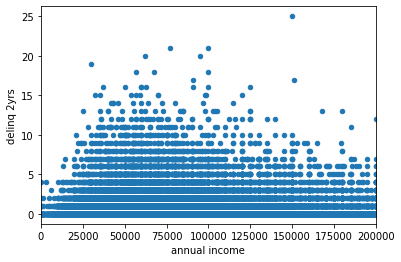

In [5]:
#STEP 5 --- Created by Patrick

#pandas imported as pd
#data = pd.read_csv('lc_2016_2017_short.csv')
#matplotlib.pyplot imported as plt

#Produce a Scatter Plot with annual_inc (annual income) on the x-axis and 
# delinq_2yrs (number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years) 
# on the y-axis (delinq 2yrs)  
#Restrict the x-axis to the range of 0 to 200,000

#Produce Scatter Plot

data.plot(kind='scatter', x='annual_inc', y='delinq_2yrs')

#Restrict x-axis to range of 0 to 200,000

plt.xlim(0, 200000)

plt.xlabel('annual income')
plt.ylabel('delinq 2yrs')
plt.show()

In [7]:
#STEP 6
#a. Build Logistic regression modeil with data_train data

from sklearn.model_selection import train_test_split
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import glm


from sklearn.linear_model import LogisticRegression

data_train, data_test = train_test_split(data, test_size=0.2)

#Create a new variable named, 'chargedOff', and make it equal to one if loan_status is 'Charged Off', and zero otherwise.
#chargedOff will be the Y variable in your model.
chargedOff = np.where(data_train.loc[:,'loan_status'] == 'Charged Off', '1', '0')

#Use the following X variables in your model: grade, dti, and delinq_2yrs.
feature_cols = ['grade', 'dti', 'delinq_2yrs']
X = data_train[feature_cols]
y = chargedOff


# Develop your logistic regression model using data_train.

xvars ='grade + dti +  delinq_2yrs'
ff =  'chargedOff'+ ' ~ ' + xvars

#  Run the logistic regression.    
model_GLM = glm(formula = ff,
data = data_train,
family = sm.families.Binomial()).fit()


# b. Print the regression results.
print(model_GLM.summary())





#c.Write an interpretation of your regression coefficients within a Jupyter notebook cell.  
#You can do this by selecting “markdown” as the cell type, as seen in the following image:
## TODOZ  - REVIEW results of print(model_GLM.summary())  and write interpretation based on odds.

#d.Use your regression model to predict the probability that loan_status is 'Charged Off',
#using the test data set, data_test.
data_test.loc[:,'predictedProb'] = model_GLM.predict(data_test)

thresh = np.sum(data_test.loc[:,'loan_status']=='Charged Off')/data_test.shape[0]
print('\nthresh=', thresh, '\n')

#  Convert the predicted probability into a predicted class, based on the threshhold  from above.
data_test.loc[:,'predictedClass'] = np.where(data_test.loc[:,'loan_status'] == 'Charged Off', '1', '0')

#  Print a crosstab of the actual and predicted churn classes in the test data.
print(pd.crosstab(data_test['loan_status'], data_test['predictedClass']))


#e. Print the mean of your predicted probability in the test data.
print('mean of predicted probability',  model_GLM.mu, '\n')

print(data_test.loc[:,'predictedProb'].mean())

                         Generalized Linear Model Regression Results                          
Dep. Variable:     ['chargedOff[0]', 'chargedOff[1]']   No. Observations:               159932
Model:                                            GLM   Df Residuals:                   159923
Model Family:                                Binomial   Df Model:                            8
Link Function:                                  logit   Scale:                          1.0000
Method:                                          IRLS   Log-Likelihood:                -29132.
Date:                                Mon, 06 Jul 2020   Deviance:                       58264.
Time:                                        21:55:37   Pearson chi2:                 1.60e+05
No. Iterations:                                     7                                         
Covariance Type:                            nonrobust                                         
                  coef    std err          z      

C:\Users\juelizon\Anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\juelizon\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
